In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 17.3 MB/s eta 0:00:00


In [ ]:
pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 11.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=c06882b54083678967217987d4ec0be30609cfce628f66ed2fe8ef7ece16228f
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
#load libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import lifelines
import shap
import keras

In [ ]:
plt.rcParams['figure.figsize'] = [10, 7]

In [ ]:
#Loading dataset using pandas
from google.colab import files
upload = files.upload()

KeyboardInterrupt: ignored

In [ ]:
data = pd.read_csv('seismic data.csv')
data

,fid,id,class_bage,class_str,class_tree,class_pop,class_imp,class_bup,Intersection_DN,check_output_class,4_class_mann_verify_4_class,v 100100 imp — v_100100_imp_true_out,v 100100 imp — v_100100_imp_true_out4
0,1,81,3,3,6,3,3,2,3,3,1,1,1
1,2,82,3,3,8,3,3,5,4,3,1,1,1
2,3,295,3,8,4,3,3,2,3,3,1,1,1
3,4,296,3,5,2,3,3,5,4,3,1,1,1
4,5,297,5,10,8,3,3,5,4,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24611,24612,45041,8,3,2,5,3,2,4,4,2,4,2
24612,24613,45042,8,3,2,5,3,2,4,4,2,4,2
24613,24614,45043,5,3,6,5,3,2,4,4,2,4,2
24614,24615,45255,8,3,6,5,3,2,4,4,2,4,2


In [ ]:
data=data.drop(['fid','id','Intersection_DN','check_output_class','4_class_mann_verify_4_class','v 100100 imp — v_100100_imp_true_out'], axis=1)
data=data.astype(int)
data

,class_bage,class_str,class_tree,class_pop,class_imp,class_bup,v 100100 imp — v_100100_imp_true_out4
0,3,3,6,3,3,2,1
1,3,3,8,3,3,5,1
2,3,8,4,3,3,2,1
3,3,5,2,3,3,5,1
4,5,10,8,3,3,5,1
...,...,...,...,...,...,...,...
24611,8,3,2,5,3,2,2
24612,8,3,2,5,3,2,2
24613,5,3,6,5,3,2,2
24614,8,3,6,5,3,2,2


In [ ]:
# c_to_s=['street_cl','imp_st_cl','b_age_cl','pop_cl','tree_cl','b_up_cl']
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# data[c_to_s]=scaler.fit_transform(data[c_to_s])

In [ ]:
y=data['v 100100 imp — v_100100_imp_true_out4'].astype(int)
X=data.drop(['v 100100 imp — v_100100_imp_true_out4'],axis=1)

In [ ]:
X

,class_bage,class_str,class_tree,class_pop,class_imp,class_bup
0,3,3,6,3,3,2
1,3,3,8,3,3,5
2,3,8,4,3,3,2
3,3,5,2,3,3,5
4,5,10,8,3,3,5
...,...,...,...,...,...,...
24611,8,3,2,5,3,2
24612,8,3,2,5,3,2
24613,5,3,6,5,3,2
24614,8,3,6,5,3,2


In [ ]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np
import keras_tuner as kt

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
train_y=keras.utils.to_categorical(train_y)
test_y=keras.utils.to_categorical(test_y)
print("X_train:",train_x.shape)
print("X_test:",test_x.shape)
print("y_train:",train_y.shape)
print("y_test:",test_y.shape)

X_train: (18462, 6)
X_test: (6154, 6)
y_train: (18462, 6)
y_test: (6154, 6)


In [ ]:
test_y = np.delete(test_y, 0, 1)
train_y = np.delete(train_y, 0, 1)
test_y

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
c=0
for i in range (6154):
  if test_y[i][4] ==1:
    c=c+1
print(c)

80


In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

NameError: ignored

In [ ]:
train_x

,class_bage,class_str,class_tree,class_pop,class_imp,class_bup
20613,5,10,10,7,3,10
12535,3,3,2,7,3,2
10830,10,5,4,4,3,7
1216,8,3,6,1,3,2
2768,8,3,2,1,3,2
...,...,...,...,...,...,...
5695,5,3,2,10,3,5
8006,10,3,2,3,3,2
17745,10,5,10,10,3,10
17931,10,10,6,9,3,7


In [ ]:
model=Sequential()
model.add(Dense(512, activation='relu',input_dim=6))
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))
sgd=SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [ ]:
# history=model.fit(train_x,train_y,validation_data=(test_x, test_y), epochs=1000, batch_size=128)
history = model.fit(
    train_x,
    train_y,
    batch_size=128,
    epochs=250,
    # Validation of loss and metrics
    # at the end of each epoch:
    validation_data=(test_x, test_y),
)

Epoch 1/250
145/145 [==============================] - 3s 14ms/step - loss: 0.8295 - accuracy: 0.6113 - val_loss: 0.7432 - val_accuracy: 0.6235
Epoch 2/250
145/145 [==============================] - 2s 17ms/step - loss: 0.7342 - accuracy: 0.6356 - val_loss: 0.7167 - val_accuracy: 0.6683
Epoch 3/250
145/145 [==============================] - 2s 11ms/step - loss: 0.7035 - accuracy: 0.6596 - val_loss: 0.7124 - val_accuracy: 0.6503
Epoch 4/250
145/145 [==============================] - 1s 9ms/step - loss: 0.6827 - accuracy: 0.6820 - val_loss: 0.6766 - val_accuracy: 0.6966
Epoch 5/250
145/145 [==============================] - 1s 8ms/step - loss: 0.6691 - accuracy: 0.6968 - val_loss: 0.7255 - val_accuracy: 0.6742
Epoch 6/250
145/145 [==============================] - 2s 11ms/step - loss: 0.6586 - accuracy: 0.7044 - val_loss: 0.6547 - val_accuracy: 0.7096
Epoch 7/250
145/145 [==============================] - 2s 11ms/step - loss: 0.6497 - accuracy: 0.7064 - val_loss: 0.6597 - val_accuracy: 0

In [ ]:
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 185


In [ ]:
eval_result = model.evaluate(test_x, test_y)
print("[test loss, test accuracy]:", eval_result)

193/193 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.7371
[test loss, test accuracy]: [0.5892792344093323, 0.7370815873146057]


In [ ]:
eval_result = model.evaluate(train_x, train_y)
print("[test loss, test accuracy]:", eval_result)

577/577 [==============================] - 2s 3ms/step - loss: 0.5306 - accuracy: 0.7571
[test loss, test accuracy]: [0.5305643677711487, 0.7570685744285583]


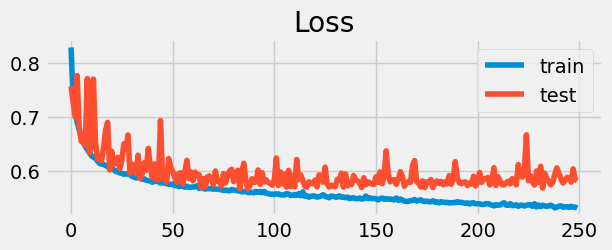

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()


Train: 0.751, Test: 0.729


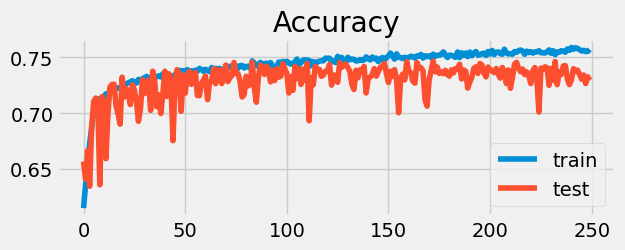

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot accuracy during training
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3584      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 137,225
Trainable params: 137,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
#Predict
y_prediction = model.predict(test_x)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(test_y, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction )
print(result)

193/193 [==============================] - 0s 1ms/step
[[3318  418    3    1    0]
 [ 680  881   16  117    0]
 [  78  141   27   51    0]
 [   6   69    5  262    1]
 [   4    9    1   65    1]]


193/193 [==============================] - 0s 1ms/step


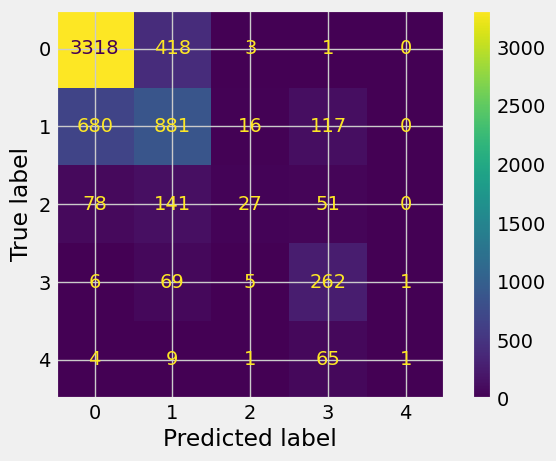

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Get the predictions
#
y_pred = model.predict(test_x)
y_prediction = np.argmax (y_pred, axis = 1)
y_test=np.argmax(test_y, axis=1)
#
# Calculate the confusion matrix
#
cm = confusion_matrix(y_test, y_prediction)
#
# Print the confusion matrix using Matplotlib
#
ConfusionMatrixDisplay(cm,).plot()

In [ ]:
test_x=test_x.drop(test_x.index[100:])
test_x

,class_bage,class_str,class_tree,class_pop,class_imp,class_bup
22335,5,10,8,6,3,7
15118,5,10,8,4,3,8
2871,8,3,10,5,3,8
5334,5,3,2,4,3,2
8811,10,5,8,8,3,8
...,...,...,...,...,...,...
23481,5,3,2,6,3,3
18022,5,5,8,10,3,7
14643,10,3,10,9,3,7
666,8,3,2,1,3,7


In [ ]:
train_x=train_x.drop(train_x.index[6000:])
train_x

,class_bage,class_str,class_tree,class_pop,class_imp,class_bup
20613,5,10,10,7,3,10
12535,3,3,2,7,3,2
10830,10,5,4,4,3,7
1216,8,3,6,1,3,2
2768,8,3,2,1,3,2
...,...,...,...,...,...,...
10445,10,8,10,8,3,10
21792,5,5,6,6,3,2
23655,5,8,6,4,3,8
3122,8,10,10,5,3,8


In [ ]:
e = shap.KernelExplainer(model, train_x)
shap_values = e.shap_values(test_x)


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
features = ['street_cl', 'imp_st_cl', 'b_age_cl',
       'pop_cl', 'tree_cl', 'b_up_cl']
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.force_plot(e.expected_value[0], shap_values[0][0], features = features)